In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Book2.xlsx to Book2.xlsx


In [3]:
# STEP 3: Load data
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, sheet_name='Sheet1')

In [4]:
print(df.keys())


Index(['Protein IDs', 'Alpha A30P_day_1_1', ' Alpha A30P_day_1_2',
       ' Alpha A30P_day_10_1', ' Alpha A30P_day_10_2', ' Alpha A53T_day_1_1',
       ' Alpha A53T_day_1_2', ' Alpha A53T_day_10_1', ' Alpha A53T_day_10_2',
       ' Alpha A53T_day_30_1', ' Alpha A53T_day_30_2', ' Alpha _day_1_1',
       ' Alpha _day_1_2', ' Alpha _day_10_1', ' Alpha _day_10_2',
       ' Alpha _day_30_1', ' Alpha _day_30_2'],
      dtype='object')


In [5]:
print(df.shape)


(4432, 17)


In [6]:
df

,Protein IDs,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,Alpha A53T_day_10_2,Alpha A53T_day_30_1,Alpha A53T_day_30_2,Alpha _day_1_1,Alpha _day_1_2,Alpha _day_10_1,Alpha _day_10_2,Alpha _day_30_1,Alpha _day_30_2
0,Q8T008;A8DY95;A1Z8A7,-0.630707,-1.048800,-1.363457,-1.449612,-0.991943,NaN,-1.464067,-1.939095,NaN,-2.285038,-1.144903,NaN,NaN,NaN,-0.646406,-1.390510
1,P12252-4;P12252-5;P12252;E2QD73;P12252-6;P1225...,-1.834030,-2.350706,-1.820311,-2.124629,-1.187871,NaN,-2.388733,-2.078198,NaN,-2.181804,-1.258322,-1.648779,-1.381122,-2.117787,-2.122366,-2.448194
2,Q9VIC9,-1.984845,NaN,-2.193833,-1.280685,-1.456999,NaN,-2.380521,-2.714633,-2.430820,-2.072483,NaN,NaN,-0.444125,-1.867121,NaN,-0.189960
3,Q7YU24;O18412,-1.037977,-1.583549,-1.725899,-2.042992,-0.804048,-1.256528,-1.649095,-1.301017,NaN,-1.980796,-0.954641,-1.284686,-1.517296,-2.158816,-0.537613,-0.992833
4,P08255,0.648926,-1.958981,-3.534981,0.174406,NaN,NaN,-0.967448,-1.357825,-0.627471,-1.930765,NaN,-0.369930,NaN,NaN,NaN,-3.020692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,Q9V771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.640482,1.726395,NaN,1.243730,0.537843,0.771548,0.571143,0.717912
4428,O97159;E1JI46;Q59E34;O16102,-1.819801,-0.991771,-1.260186,NaN,-1.258563,-2.052715,NaN,NaN,0.459851,-0.911750,-1.502260,-2.145797,-0.977043,-0.582555,-1.687056,-0.233006
4429,Q9VYQ8,-2.645119,-1.308859,-2.134477,-1.697968,-1.877261,-0.962238,-1.931536,-1.724611,0.093154,-1.275332,-1.677010,-2.070542,-1.961789,-1.953383,-2.385187,-1.118038
4430,Q9VWT1;Q8IQX8,-1.364348,-1.976305,-1.202970,-1.173840,-1.890145,-2.204898,-1.420472,-1.337630,2.648834,-1.484954,-1.323805,-1.671393,-0.775441,-0.949227,-1.156724,-1.075398


In [7]:
df.dropna(inplace = True)
print(df.shape)

(1505, 17)


In [8]:
df = df.set_index('Protein IDs')


In [9]:
# Clean column names of leading/trailing whitespace
df.columns = [col.strip() for col in df.columns]

print("Cleaned column names:")
print(df.columns)

Cleaned column names:
Index(['Alpha A30P_day_1_1', 'Alpha A30P_day_1_2', 'Alpha A30P_day_10_1',
       'Alpha A30P_day_10_2', 'Alpha A53T_day_1_1', 'Alpha A53T_day_1_2',
       'Alpha A53T_day_10_1', 'Alpha A53T_day_10_2', 'Alpha A53T_day_30_1',
       'Alpha A53T_day_30_2', 'Alpha _day_1_1', 'Alpha _day_1_2',
       'Alpha _day_10_1', 'Alpha _day_10_2', 'Alpha _day_30_1',
       'Alpha _day_30_2'],
      dtype='object')


In [12]:
import re

def parse_column_name(col_name):
    parts = re.match(r'(Alpha(?: A\d{2}T| A\d{2}P)?_day_(\d+)_(\d+))', col_name)
    if parts:
        full_name_prefix, day, replicate = parts.groups()
        # Handle different Alpha types, then days, then replicates
        if 'A30P' in full_name_prefix:
            type_order = 0
        elif 'A53T' in full_name_prefix:
            type_order = 1
        else: # Regular Alpha
            type_order = 2
        return (type_order, int(day), int(replicate))
    return (len(df.columns), 0, 0) # Fallback for unmatching names, puts them at the end

# Get current columns (excluding 'Protein IDs' if it were still a column, but it's an index)
current_columns = df.columns.tolist()

# Sort the columns using the custom key
sorted_columns = sorted(current_columns, key=parse_column_name)

# Reindex the DataFrame with the sorted columns
df = df[sorted_columns]

print("Reordered column names:")
print(df.columns)

Reordered column names:
Index(['Alpha A30P_day_1_1', 'Alpha A30P_day_1_2', 'Alpha A30P_day_10_1',
       'Alpha A30P_day_10_2', 'Alpha A53T_day_1_1', 'Alpha A53T_day_1_2',
       'Alpha A53T_day_10_1', 'Alpha A53T_day_10_2', 'Alpha A53T_day_30_1',
       'Alpha A53T_day_30_2', 'Alpha _day_1_1', 'Alpha _day_1_2',
       'Alpha _day_10_1', 'Alpha _day_10_2', 'Alpha _day_30_1',
       'Alpha _day_30_2'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


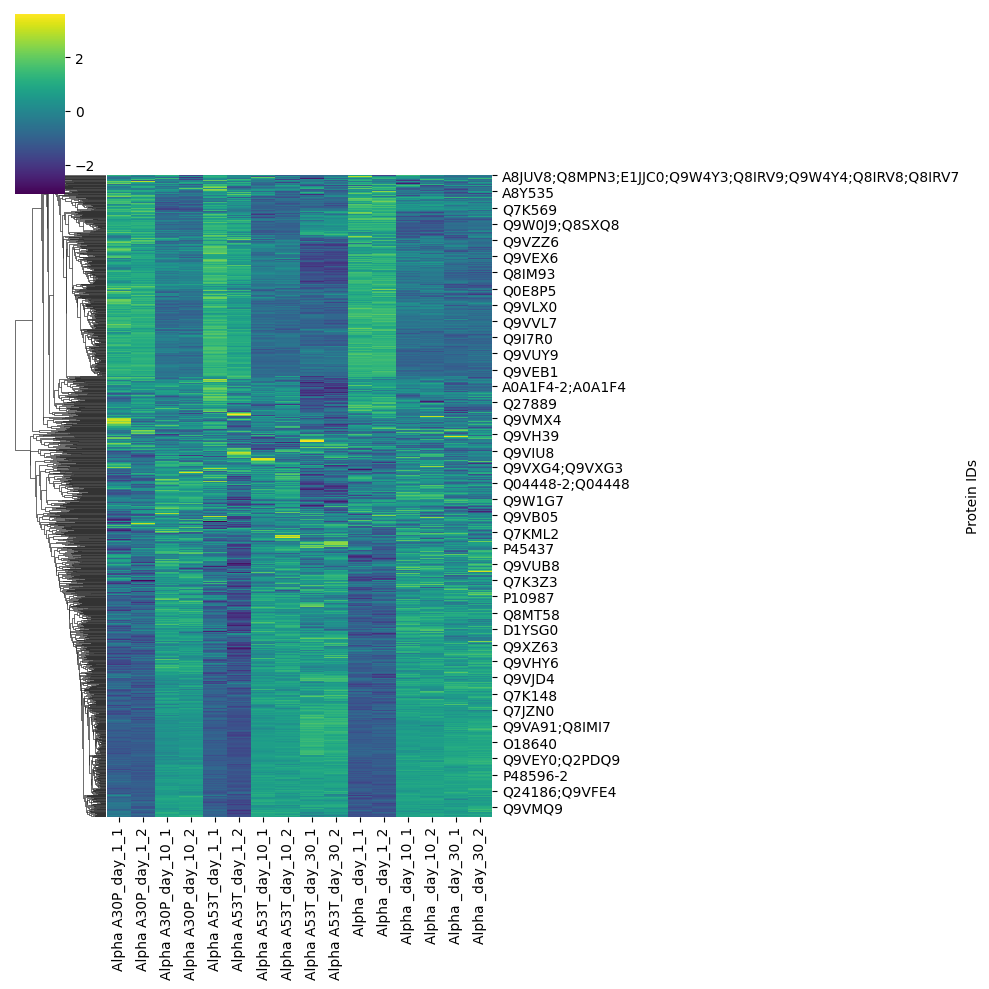

In [15]:
sns.clustermap(df, col_cluster=False, metric="euclidean", z_score=0, method="average", cmap="viridis")

png_path = 'Replicate_Clustermap.png'
pdf_path = 'Replicate_Clustermap.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


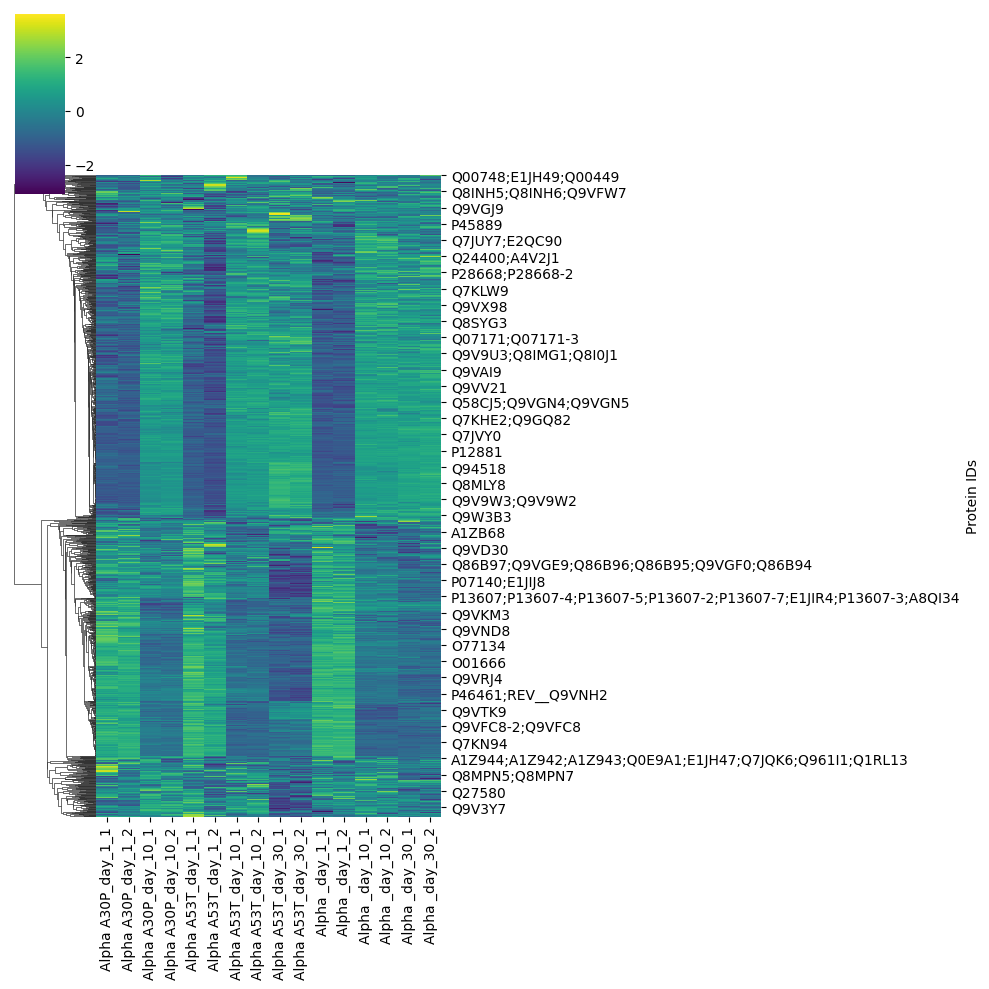

In [17]:
sns.clustermap(df, col_cluster=False, metric="Correlation", z_score=0, method="average", cmap="viridis")
plt.show()